In [28]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from texture_net_train import cluster_patches
import matplotlib.animation as animation
%matplotlib notebook

In [29]:
#load data
componentfile = 'componenttest_200_1000_10000.h5'
savepath = './output/'
x = h5py.File(savepath + componentfile, 'r')['dat'][()]
clusterinds = cluster_patches(componentfile, savepath)

In [30]:
#load imdata
datadir = '/scratch/np1742/texture-modeling/dat/'
imorig = h5py.File(datadir + 'cropped512-gray-jpg.h5', 'r')['dat']
im = h5py.File(datadir + 'cropped512-gray-jpg_200_1000.h5', 'r')['dat'][0:10000]
inds = h5py.File(datadir + 'cropped512-gray-jpg_200_1000.h5', 'r')['inds'][0:10000]

In [ ]:
#plt.ion() # turn on interactive mode, non-blocking `show`
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.show()

for i in range(10):
    img = ax.imshow(imorig[i], cmap='gray')
    plt.title(str(i))
    plt.draw()

    accept = input('OK? ')




    

<IPython.core.display.Javascript object>

OK? 


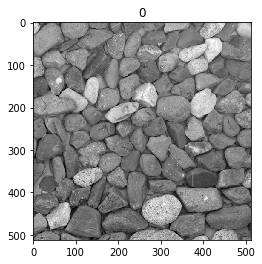

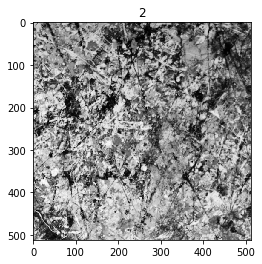

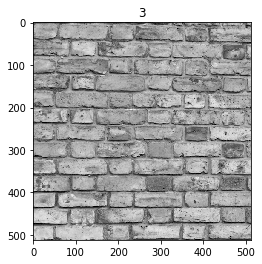

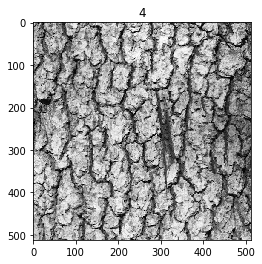

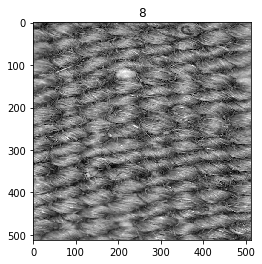

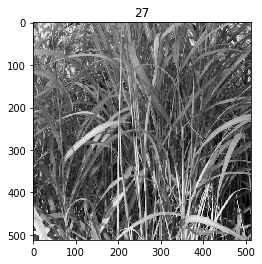

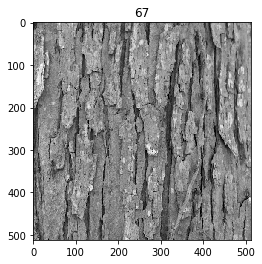

In [28]:
imlist = [0,2,3,4,8,27,67]
for i in range(len(imlist)):
    n = imlist[i]
    inds = inds[inds == n]
    plt.figure()
    plt.imshow(imorig[n], cmap='gray')
    plt.title(str(n))

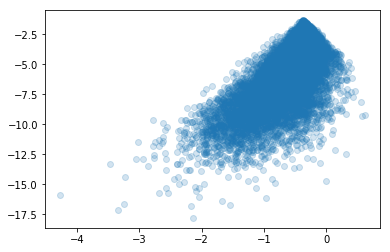

In [6]:
# create figure and plot scatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = x[:,0]
x2 = x[:,1]
line, = ax.plot(x1,x2, ls="", marker="o", alpha=0.2,c =)

# create the annotations box
im = OffsetImage(imarr[0,:,:], zoom=5)
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x1 > w/2.)*-1 + (event.x1 <= w/2.) 
        hs = (event.x2 > h/2.)*-1 + (event.x2 <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x1[ind], x2[ind])
        # set the image corresponding to that point
        im.set_data(imarr[ind,:,:])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()